# **A Smartphone assistance for Blind & Visually Impaired using Deep Learning (Regression)**

Source Code Reference: https://github.com/PacktPublishing/The-Complete-Self-Driving-Car-Course---Applied-Deep-Learning/blob/master/S14/Final%20Source%20Code.txt

## The Road Map

##### 1.   Environment Setup with Dataset 
##### 2.   Import Libraries and packages
##### 3.   Exploratory Data Analysis
##### 4.   Data Preprocessing and Augmentation
##### 5.   Apply CNN's NVIDIA VGGNET Model & AlexNet 


## 1.   Environment Setup with Dataset

### 1a.  Directory Clean Up

In [1]:
!rm -r SmartphoneAssistanceForBlind   

rm: cannot remove 'SmartphoneAssistanceForBlind': No such file or directory


### 1b.   Clone the repository

In [2]:
!git clone https://github.com/jshankarrepo/A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning.git

Cloning into 'A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning'...
remote: Enumerating objects: 12187, done.
remote: Counting objects: 100% (12187/12187), done.
remote: Compressing objects: 100% (12186/12186), done.
remote: Total 27167 (delta 0), reused 12184 (delta 0), pack-reused 14980
Receiving objects: 100% (27167/27167), 1.31 GiB | 15.08 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (19706/19706), done.


### 1c.  Data Verification

In [3]:
#![ ! -f HelpBlindWalkInaPark/images/image_000000 ] && echo "Found" || echo "Not found"
!(ls A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning/dataset/regression/images/image_1.jpg >> /dev/null 2>&1 && echo yes) || echo no


yes


In [4]:
!ls A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning -lth

total 892K
drwxr-xr-x 2 root root 4.0K Jan 13 16:25 'source code'
drwxr-xr-x 4 root root 4.0K Jan 13 16:25  dataset
-rw-r--r-- 1 root root 879K Jan 13 16:25 'A Smartphone Assistance for Blind & Visually Impaired using Deep Learning.pdf'
-rw-r--r-- 1 root root   76 Jan 13 16:25  README.md


In [0]:
import os
os.chdir('A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning/dataset/regression')

In [6]:
!pwd

/content/A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning/dataset/regression


In [0]:
!ls SmartphoneAssistanceForBlind/images -1 | wc -l


7453


### 1d.  Use Tensorflow GPU framework

In [0]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 41.8MB/s 
     |████████████████████████████████| 450kB 45.4MB/s 
     |████████████████████████████████| 81kB 14.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


## 2. Import Libraries and packages

### 2a.  Import libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Convolution2D, Dropout, Flatten, Dense, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential

from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import numpy as np


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


### 2b.  Load Data

In [0]:
datadir = 'SmartphoneAssistanceForBlind'
columns = ['image_id' , 'time', 'angle']
data = pd.read_csv(os.path.join(datadir, 'walking_log.csv') , names= columns)
pd.set_option('display.max_colwidth', -1)
data.head()

data['image_id'] = [s + '.jpg' for s in data['image_id']]
data.head()

image_id         time  angle
0  image_1.jpg  15:33:33:1   0.02 
1  image_2.jpg  15:33:33:2   0.02 
2  image_3.jpg  15:33:33:3   0.03 
3  image_4.jpg  15:33:33:4   0.02 
4  image_5.jpg  15:33:33:5   0.01

## 1.  Exploratory Data Analysis

### 3a. Visualize the turning angle in 3 bins using Histogram

[-0.27       -0.11666667  0.03666667  0.19      ]


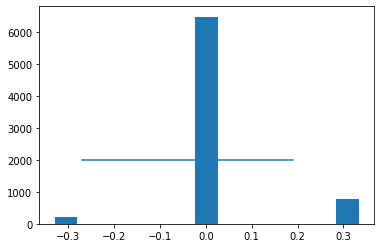

In [0]:
num_bins = 3
samples_per_bin = 1500
hist, bins = np.histogram(data['angle'], num_bins)
print(bins)
center = (bins[:-1]+ bins[1:])  + 0.082
np.round(center, 2)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['angle']), np.max(data['angle'])), (samples_per_bin, samples_per_bin))


### 3b.  List total number of rows

In [0]:
print('total data:', len(data))


total data: 7453


### 3c.  Shuffle and Remove empty list 

In [0]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['angle'])):
    if data['angle'][i] >= bins[j] and data['angle'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))


removed: 4468
remaining: 2985


### 3d. Visualize after cleaning the data: The turning angle in 3 bins using Histogram



<BarContainer object of 3 artists>

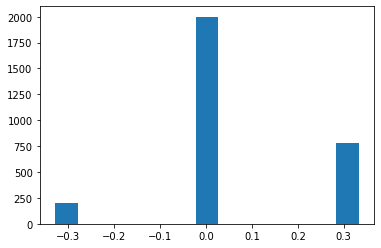

In [0]:
hist, _ = np.histogram(data['angle'], (num_bins))
plt.bar(center, hist, width=0.05)

### 3e. Load Images and Angle in an array to split the data into Training and Validation set

In [0]:
def load_img_angles(datadir, df):
  image_path = []
  angles = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_path.append(os.path.join(datadir,indexed_data[0].strip()))
    angles.append(float(indexed_data[2]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angles)
  return image_paths, angles


In [0]:
image_paths, angles = load_img_angles(datadir + '/images', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, angles, test_size=0.2, random_state=6)
print('Training Samples: {}\n Valid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 2388
 Valid Samples: 597


### 3f. Visualize after Splitting the data into Train and Validation Set: The turning angle in 3 bins using Histogram



Text(0.5, 1.0, 'Validation set')

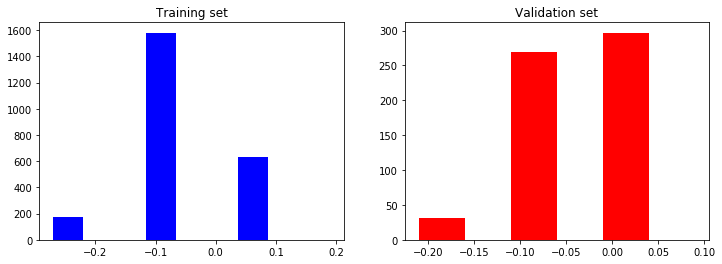

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')


## 4. Data Preprocessing and Augmentation


### 4a. Zoom an Image function and plot original and zoomed Image

In [0]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1, 'Zoomed Image')

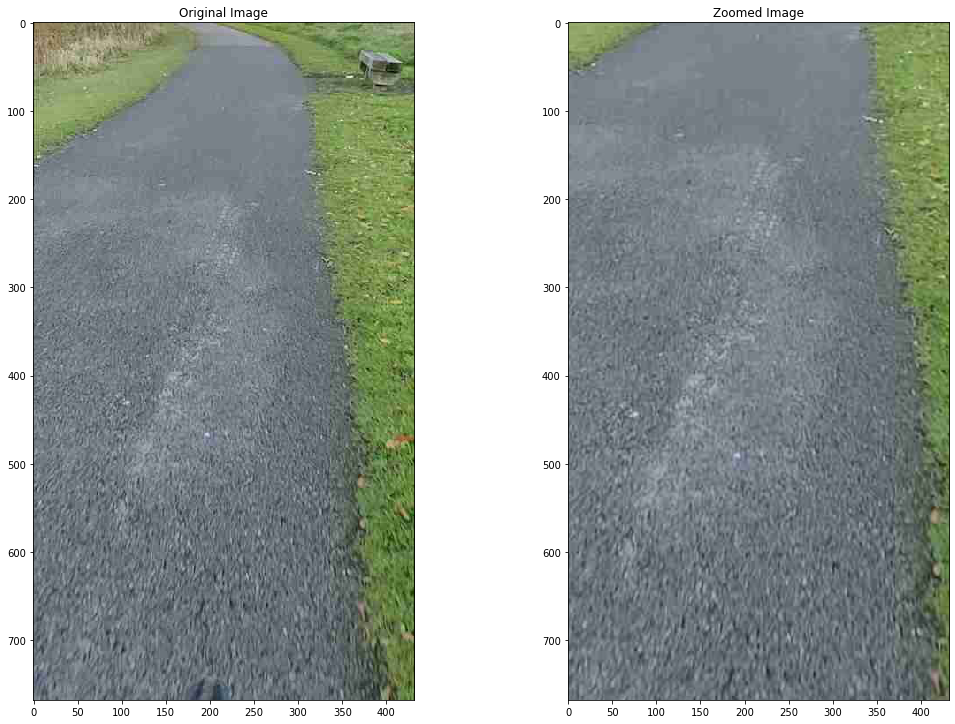

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')



### 4b. Panning an Image and plot original and zoomed Image

In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1, 'Panned Image')

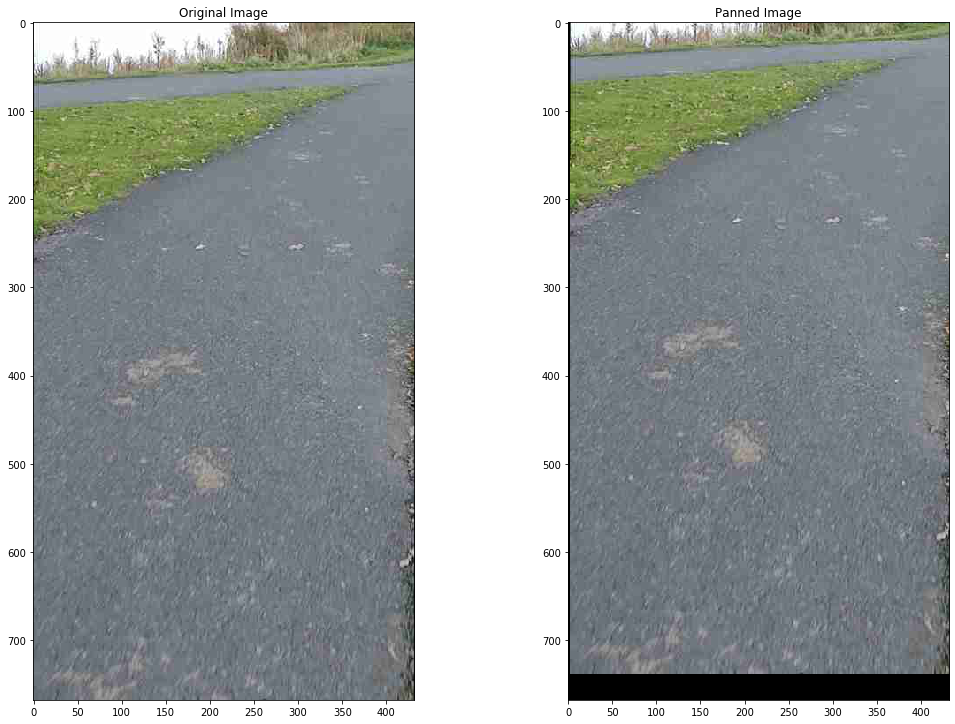

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')



### 4c.  Random Increase Image brightness and plot original and zoomed Image

In [0]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image


Text(0.5, 1, 'Brightness altered image ')

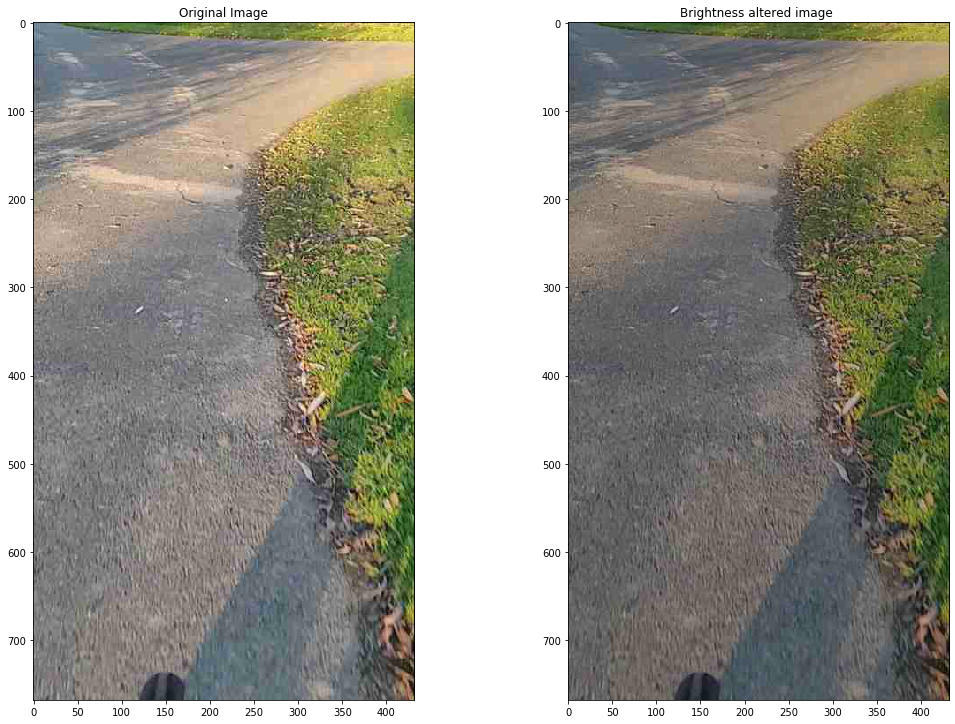

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')



### 4d. Random Flip the orientation of the Images and plot original and zoomed Image

In [0]:
def img_random_flip(image, direction_angle):
    image = cv2.flip(image,1)
    direction_angle = -direction_angle
    return image, direction_angle

In [0]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
direction_angles = angles[random_index]

Text(0.5, 1, 'Flipped Image - Steering Angle:0.08')

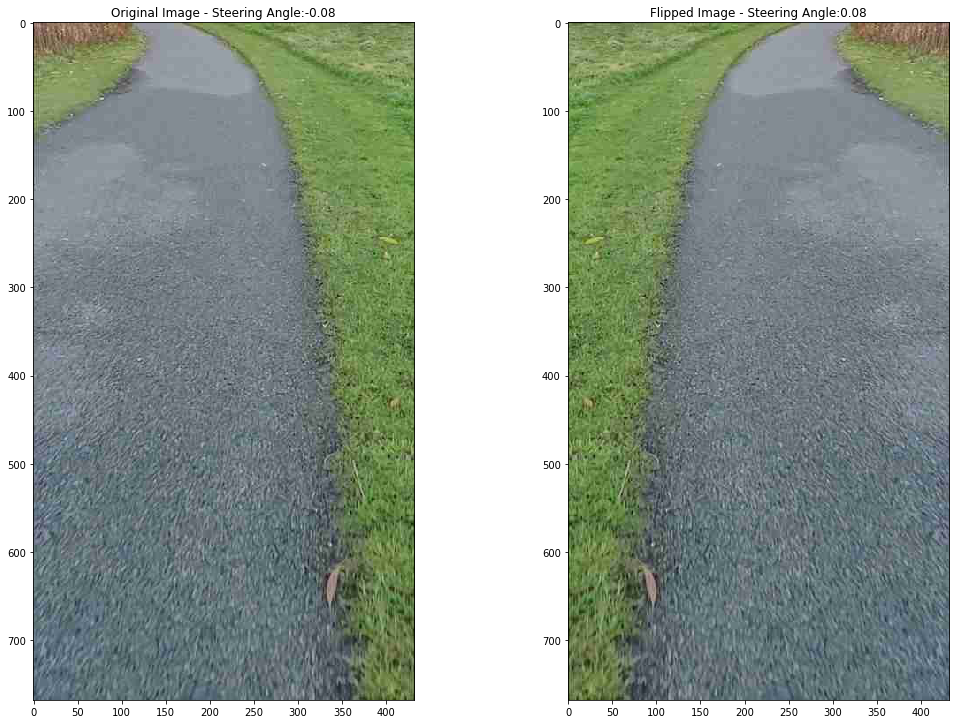

In [0]:
original_image = mpimg.imread(image)
flipped_image, flipped_direction_angle = img_random_flip(original_image, direction_angles)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(direction_angles))
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_direction_angle))


4e. Random Augumentation of the Images and plot original and zoomed Image

In [0]:
def random_augment(image, direction_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, direction_angle = img_random_flip(image, direction_angle)
    
    return image, direction_angle



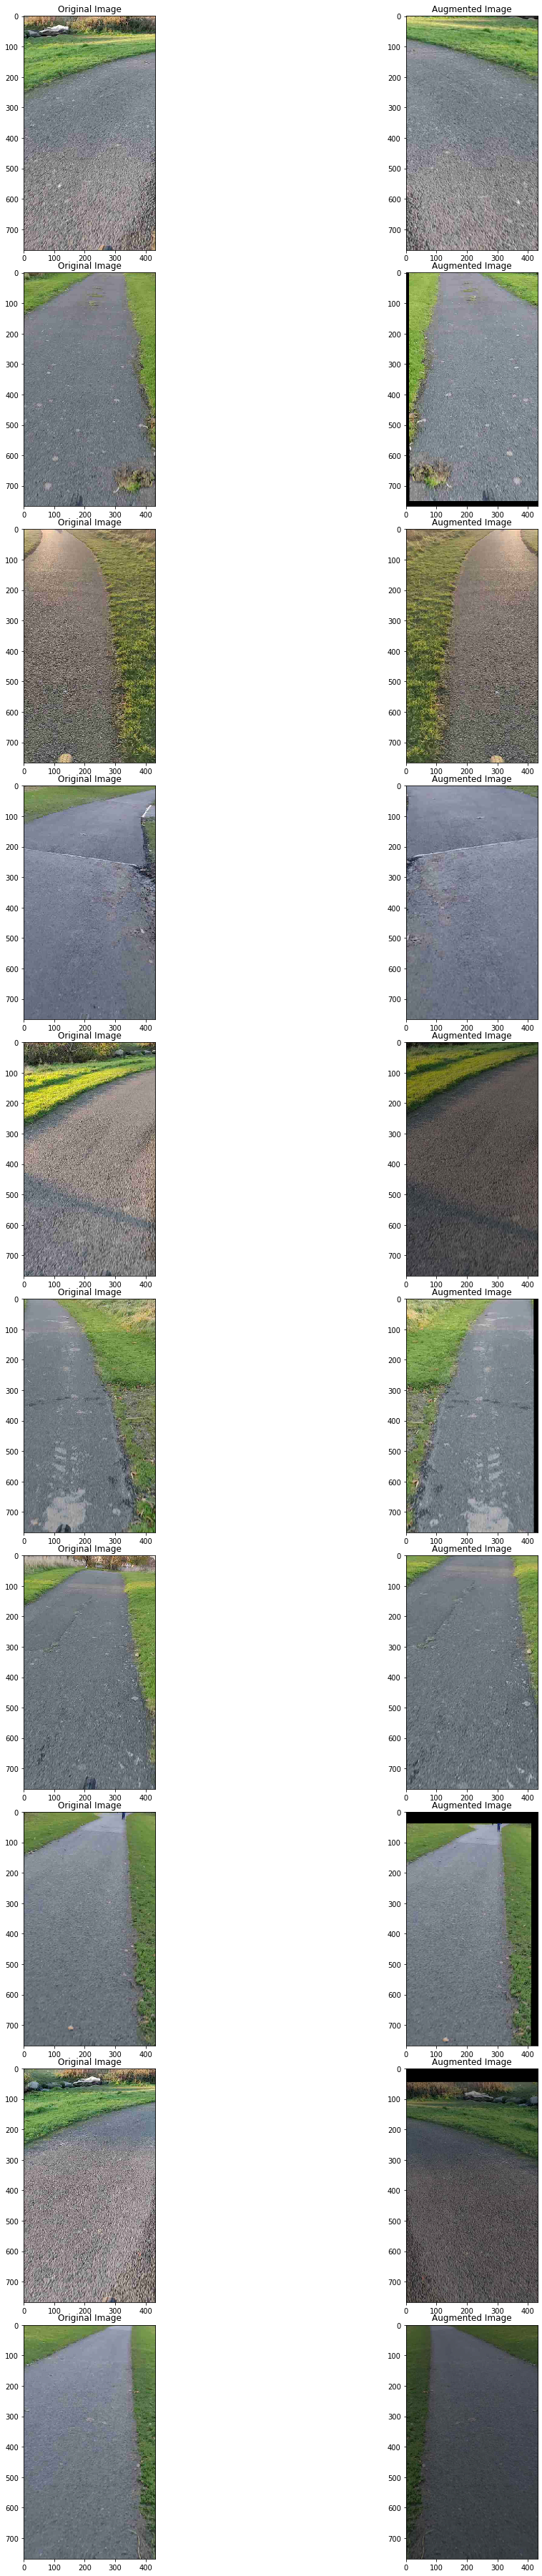

In [0]:
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = angles[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")



### 4e. Image Preprocessing: Color, Smoothing and Resize

In [0]:
def img_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)


Text(0.5, 1, 'Preprocessed Image')

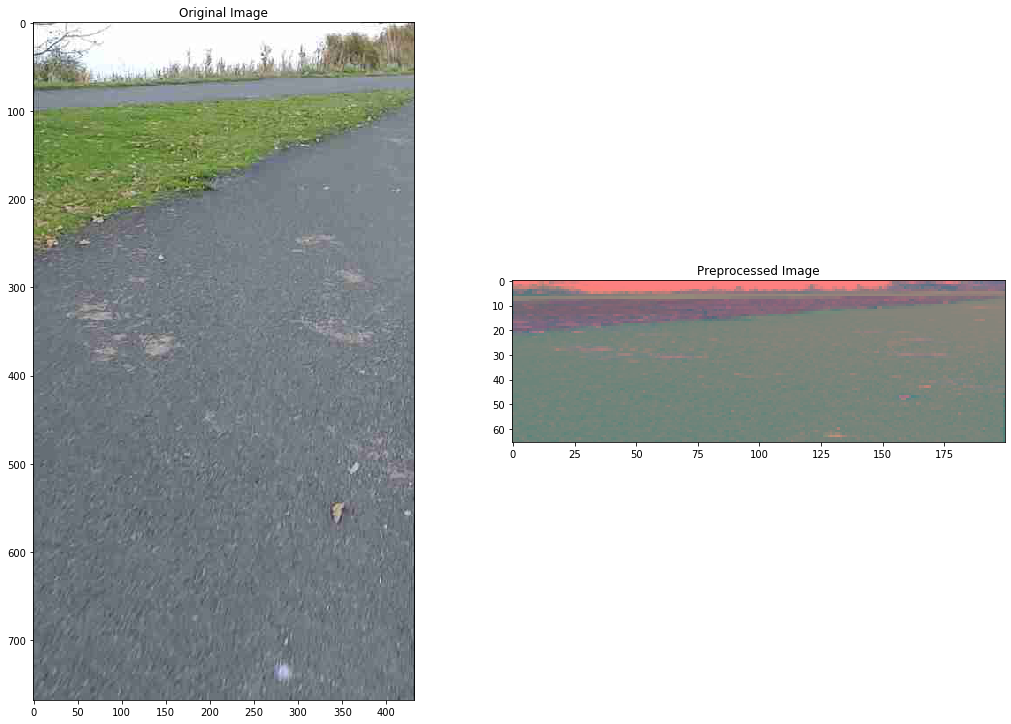

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

### 4f.  Batch Generator

In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

In [0]:
batch_size = 32
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, int(2388 // batch_size), 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, int(597 // batch_size), 0))

In [0]:
x_valid_gen.shape

(18, 66, 200, 3)

Text(0.5, 1, 'Validation Image')

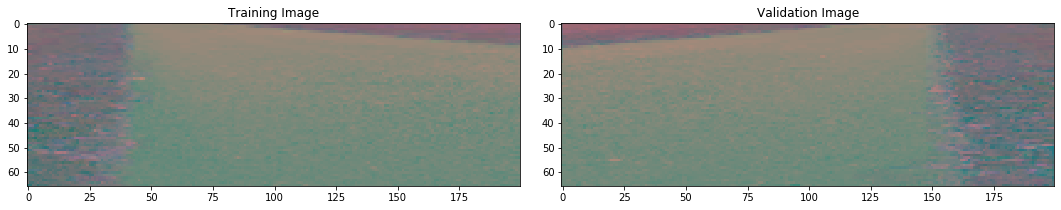

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')


## 5.   Apply CNN's NVIDIA & VGGNET Model 

### 5a. NVIDIA CNN Model function

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, (5, 5), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, (5, 5), activation='elu'))
  model.add(Convolution2D(48, (5, 5), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Dropout(0.5))
 
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model


### 5b.  Invoke NVIDIA function and summarize

In [0]:
nvidia_model = nvidia_model()
print(nvidia_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 196, 24)       1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 192, 36)       21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 188, 48)       43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 186, 64)       27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 184, 64)       36928     
_________________________________________________________________
dropout (Dropout)            (None, 50, 184, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 588800)            0

### 5c.  Train the NVIDIA Model using Fit Generator function

In [0]:
history = nvidia_model.fit_generator(batch_generator(X_train, y_train, int(2388 // batch_size), 1),
                                  steps_per_epoch=int(2388 // batch_size), 
                                  epochs=10,
                                  validation_data = batch_generator(X_valid, y_valid, int(597 // batch_size), 0),
                                  validation_steps=int(597 // batch_size),
                                  use_multiprocessing=True,                                  
                                  verbose=1,
                                  shuffle = 1)


Epoch 1/10
74/74 [==============================] - 84s 1s/step - loss: 2.6961 - val_loss: 0.6495
Epoch 2/10
74/74 [==============================] - 81s 1s/step - loss: 2.4725 - val_loss: 0.6104
Epoch 3/10
74/74 [==============================] - 80s 1s/step - loss: 2.4785 - val_loss: 0.6359
Epoch 4/10
74/74 [==============================] - 80s 1s/step - loss: 2.4547 - val_loss: 0.6284
Epoch 5/10
74/74 [==============================] - 81s 1s/step - loss: 2.3743 - val_loss: 0.6343
Epoch 6/10
74/74 [==============================] - 81s 1s/step - loss: 2.3969 - val_loss: 0.5966
Epoch 7/10
74/74 [==============================] - 82s 1s/step - loss: 2.3216 - val_loss: 0.5890
Epoch 8/10
74/74 [==============================] - 80s 1s/step - loss: 2.2112 - val_loss: 0.6001
Epoch 9/10
74/74 [==============================] - 81s 1s/step - loss: 2.2514 - val_loss: 0.5356
Epoch 10/10
74/74 [==============================] - 81s 1s/step - loss: 2.2574 - val_loss: 0.5483


Text(0.5, 0, 'Epoch')

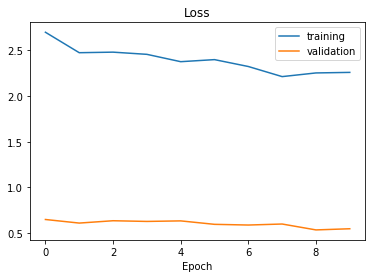

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
evaluate = nvidia_model.evaluate(batch_generator(X_valid, y_valid, int(597 // batch_size), 1), verbose = 1, steps = int(597 // batch_size))

18/18 [==============================] - 4s 241ms/step - loss: 0.5623


In [0]:
evaluate
print('val accuracy: {}'.format(evaluate * 100))

val accuracy: 56.23170038064321


### 5e.  VGGNET CNN Model Function

In [0]:
def vggnet(width, height, depth):
		# initialize the input shape and channel dimension, assuming
		# TensorFlow/channels-last ordering
		inputShape = (height, width, depth)
		chanDim = -1

		# define the model input
		inputs = tf.keras.layers.Input(shape=inputShape)

		# first (CONV => RELU) * 2 => POOL layer set
		x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(inputs)
		x = tf.keras.layers.Activation("elu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(x)
		x = tf.keras.layers.Activation("elu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
		x = tf.keras.layers.Dropout(0.25)(x)

		# second (CONV => RELU) * 2 => POOL layer set
		x = tf.keras.layers.Conv2D(64, (3, 3), padding="same")(x)
		x = tf.keras.layers.Activation("elu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.Conv2D(64, (3, 3), padding="same")(x)
		x = tf.keras.layers.Activation("elu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
		x = tf.keras.layers.Dropout(0.25)(x)

		# set of FC => RELU layers
		x = tf.keras.layers.Flatten()(x)
		x = tf.keras.layers.Dense(512)(x)
		x = tf.keras.layers.Activation("elu")(x)
		x = tf.keras.layers.BatchNormalization()(x)
		x = tf.keras.layers.Dropout(0.5)(x)

		# softmax classifier
		x = tf.keras.layers.Dense(1)(x)
		x = tf.keras.layers.Activation("elu")(x)

		# create the model
		model = tf.keras.models.Model(inputs, x, name="smallvggnet_tf")

		# return the constructed network architecture

		# optimizer = Adam(lr=1e-3)
  	# model.compile(loss='mse', optimizer=optimizer)
	 
		opt = SGD(lr=0.001, decay=0.01 / 40, momentum=0.9, nesterov=True)
		model.compile(loss="mse", optimizer=opt,	metrics=["accuracy"])
		return model

### 5b.  Invoke VGGNET function and summarize

In [0]:
vggnet_model = vggnet(200, 66, 3)
print(vggnet_model.summary())


Model: "smallvggnet_tf"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 66, 200, 3)]      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 66, 200, 32)       896       
_________________________________________________________________
activation (Activation)      (None, 66, 200, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 66, 200, 32)       128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 66, 200, 32)       9248      
_________________________________________________________________
activation_1 (Activation)    (None, 66, 200, 32)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 200, 32)    

### 5f.  Train the VGGNET Model using Fit Generator function

In [0]:
vgg_history = vggnet_model.fit_generator(batch_generator(X_train, y_train, int(2388 // batch_size), 1),
                                  steps_per_epoch=int(2388 // batch_size), 
                                  epochs=10,
                                  validation_data = batch_generator(X_valid, y_valid, int(597 // batch_size), 0),
                                  validation_steps=int(597 // batch_size),
                                  use_multiprocessing=True,                                  
                                  verbose=1,
                                  shuffle = 1)


Epoch 1/10
74/74 [==============================] - 82s 1s/step - loss: 5.1335 - accuracy: 0.0436 - val_loss: 0.7003 - val_accuracy: 0.0895
Epoch 2/10
74/74 [==============================] - 79s 1s/step - loss: 0.6573 - accuracy: 0.0486 - val_loss: 0.3665 - val_accuracy: 0.0185
Epoch 3/10
74/74 [==============================] - 80s 1s/step - loss: 0.5906 - accuracy: 0.0539 - val_loss: 0.1950 - val_accuracy: 0.0525
Epoch 4/10
74/74 [==============================] - 80s 1s/step - loss: 0.5254 - accuracy: 0.0524 - val_loss: 0.3819 - val_accuracy: 0.0617
Epoch 5/10
74/74 [==============================] - 80s 1s/step - loss: 0.4517 - accuracy: 0.0513 - val_loss: 0.0716 - val_accuracy: 0.0772
Epoch 6/10
74/74 [==============================] - 80s 1s/step - loss: 0.3778 - accuracy: 0.0513 - val_loss: 0.0433 - val_accuracy: 0.0586
Epoch 7/10
74/74 [==============================] - 81s 1s/step - loss: 0.2936 - accuracy: 0.0508 - val_loss: 0.0192 - val_accuracy: 0.0370
Epoch 8/10
74/74 [==

Text(0.5, 0, 'Epoch')

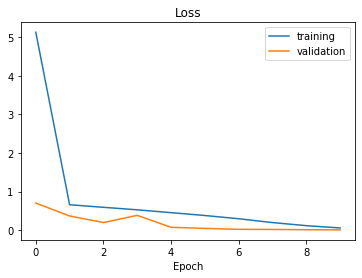

In [0]:
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [0]:
vgg_evaluate = vggnet_model.evaluate(batch_generator(X_valid, y_valid, int(597 // batch_size), 1), verbose = 1, steps = int(597 // batch_size))

18/18 [==============================] - 7s 375ms/step - loss: 0.0112 - accuracy: 0.0864


In [0]:
print('val accuracy: {}'.format(vgg_evaluate * 100))

val accuracy: 56.23170038064321


### Alexnet Development in progress

In [0]:
def alexNetModel():
	model = Sequential()
	# First layer: Convolutional layer with max pooling and batch normalization.
	model.add(Convolution2D(3, (11, 11), input_shape=(66, 200, 3), padding="valid", activation='elu'))
	model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2),padding="valid"))
	model.add(BatchNormalization())

	# Second layer: Convolutional layer with max pooling and batch normalization.
	model.add(Convolution2D(256, (11, 11), strides=(1, 1), padding="valid", activation='elu'))
	model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2),padding="valid"))
	model.add(BatchNormalization())

	# Third layer: Convolutional layer with batch normalization.
	model.add(Convolution2D(384, (3, 3),strides=(1, 1), padding="valid", activation='elu'))
	model.add(BatchNormalization())	

	# Fourth layer: Convolutional layer with batch normalization.
	model.add(Convolution2D(384, (3, 3),strides=(1, 1), padding="valid", activation='elu'))
	model.add(BatchNormalization())	

	# Fifth layer: Convolutional layer with max pooling and batch normalization.
	model.add(Convolution2D(256, (3, 3), strides=(1, 1), padding="valid", activation='elu'))
	model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2),padding="valid"))
	model.add(BatchNormalization())

	# Flatten the output to feed it to dense layers
	model.add(Flatten())

	# Sixth layer: fully connected layer with 4096 neurons with 40% dropout and batch normalization.
	model.add(Dense(4096, activation = 'elu'))
	model.add(Dropout(0.4))
	model.add(BatchNormalization())

	# Seventh layer: fully connected layer with 4096 neurons with 40% dropout and batch normalization.
	model.add(Dense(4096, activation = 'elu'))
	model.add(Dropout(0.4))
	model.add(BatchNormalization())

	# Eigth layer: fully connected layer with 1000 neurons with 40% dropout and batch normalization.
	model.add(Dense(1000, activation = 'elu'))
	model.add(Dropout(0.4))
	model.add(BatchNormalization())

	# Output layer: softmax function of 102 classes of the dataset. This integer should be changed to match
	# the number of classes in your dataset if you change from Oxford_Flowers.
	model.add(Dense(1, activation='elu'))

	optimizer = Adam(lr=1e-3)
	model.compile(loss='mse', optimizer=optimizer)
	return model

In [0]:
alexnet_model = alexNetModel()
print(alexnet_model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 56, 190, 3)        1092      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 95, 3)         0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 95, 3)         12        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 18, 85, 256)       93184     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 42, 256)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 9, 42, 256)        1024      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 40, 384)       

In [0]:
alex_history = alexnet_model.fit_generator(batch_generator(X_train, y_train, int(2388 // batch_size), 1),
                                  steps_per_epoch=int(2388 // batch_size), 
                                  epochs=10,
                                  validation_data = batch_generator(X_valid, y_valid, int(597 // batch_size), 0),
                                  validation_steps=int(597 // batch_size),
                                  use_multiprocessing=True,                                  
                                  verbose=1,
                                  shuffle = 1)


Epoch 1/10
74/74 [==============================] - 77s 1s/step - loss: 2.9878 - val_loss: 0.8697
Epoch 2/10
74/74 [==============================] - 73s 988ms/step - loss: 0.3277 - val_loss: 0.4442
Epoch 3/10
74/74 [==============================] - 74s 1s/step - loss: 0.3052 - val_loss: 0.1078
Epoch 4/10
74/74 [==============================] - 74s 1s/step - loss: 0.2720 - val_loss: 0.0840
Epoch 5/10
74/74 [==============================] - 74s 995ms/step - loss: 0.2363 - val_loss: 0.0122
Epoch 6/10
74/74 [==============================] - 74s 995ms/step - loss: 0.2033 - val_loss: 0.0129
Epoch 7/10
74/74 [==============================] - 75s 1s/step - loss: 0.1708 - val_loss: 0.0170
Epoch 8/10
74/74 [==============================] - 74s 999ms/step - loss: 0.1541 - val_loss: 0.0546
Epoch 9/10
74/74 [==============================] - 74s 1s/step - loss: 0.1220 - val_loss: 0.0166
Epoch 10/10
74/74 [==============================] - 73s 982ms/step - loss: 0.1016 - val_loss: 0.0058


Text(0.5, 0, 'Epoch')

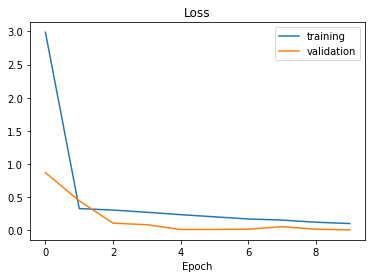

In [0]:
plt.plot(alex_history.history['loss'])
plt.plot(alex_history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
alex_evaluate = alexnet_model.evaluate(batch_generator(X_valid, y_valid, int(597 // batch_size), 1), verbose = 1, steps = int(597 // batch_size))

18/18 [==============================] - 4s 225ms/step - loss: 0.0042


In [0]:
print('val accuracy: {}'.format(alex_evaluate * 100))

val accuracy: 0.4208039278940608
